# <span><center><div style="font-family: Trebuchet MS; background-color: #1e81b0; color: #eeeee4; padding: 12px; line-height: 1;">Online Payments Fraud Exploration Notebook And Cleaning</div></center></span>

<center>
<img src="https://images.unsplash.com/photo-1518458028785-8fbcd101ebb9?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80" alt="Money" width="50%">
<figcaption>Photo by <a href="https://unsplash.com/@sharonmccutcheon?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Alexander Grey</a> on <a href="https://unsplash.com/photos/-8a5eJ1-mmQ?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  </figcaption>
</center>

## Bussiness Understanding

Fraudulent transaction detection is a critical business problem for many organizations, particularly those in the financial sector. Fraudulent transactions can cause significant financial losses, damage to a company's reputation, and erosion of customer trust. Therefore, detecting and preventing fraudulent transactions is essential for maintaining a healthy bottom line and ensuring customer satisfaction. With the increasing use of electronic payment systems and online transactions, the volume and complexity of fraud cases have grown significantly in recent years, making it increasingly

difficult for companies to detect and prevent fraud manually. Machine learning-based approaches can help companies automate the process of identifying fraudulent transactions by analyzing large amounts of transaction data in real-time.  These models can learn to detect patterns and anomalies in transaction data, enabling them to identify suspicious activity and flag it for further investigation. 

## Data Understanding
The data source used on this project is from the following site https://www.kaggle.com/code/nehahatti/online-payments-fraud-detection-project, the dataset will not be pushed to git because the file is too large.

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

# <span><center><div style="font-family: Trebuchet MS; background-color: #1e81b0; color: #eeeee4; padding: 12px; line-height: 1;">Import Necessary Libraries</div></center></span>

In [5]:
# Exploration purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# <span><center><div style="font-family: Trebuchet MS; background-color: #1e81b0; color: #eeeee4; padding: 12px; line-height: 1;">Load Dataset</div></center></span>

In [6]:
dataset_dir = '../dataset/fraud-payments.csv'
payment_fraud_df = pd.read_csv(dataset_dir)

In [7]:
# Check dataset preview
payment_fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# <span><center><div style="font-family: Trebuchet MS; background-color: #1e81b0; color: #eeeee4; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center></span>

## Check Basic Data Info

In [8]:
# See basic info
payment_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Seems like our dataset consists of 6362620 rows and 11 columns.  With 1 containing column labels, 3 column have object dtypes and the rest is numeric dtypes.

In [9]:
# Check if there's null value
payment_fraud_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# Check duplicated data, because there is no distinct id column we can check duplicated records with multiple column
duplicates = payment_fraud_df[payment_fraud_df.duplicated(['nameOrig', 'nameDest', 'step'])]

In [11]:
if duplicates.empty:
    print("There's no duplicate record.")
else:
    print(f'Duplicates record found: {duplicates}')


There's no duplicate record.


## See label distribution

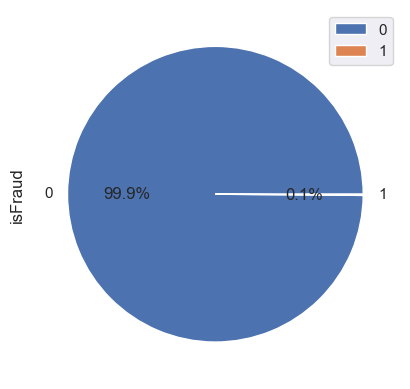

In [71]:
payment_fraud_df['isFraud'].value_counts().plot(kind='pie', legend=payment_fraud_df['isFraud'].value_counts, autopct='%1.1f%%', )
plt.show()

In [12]:
payment_fraud_df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
fraud_percentage = (8213/6362620)*100
nonfraud_percentage = (6354407/6362620)*100

print(f"""We can see that this dataset is very imbalanced with fraud transaction only {fraud_percentage:.1f}% and 
    non-fraud transaction {nonfraud_percentage:.1f}%, This is expected of this kind of dataset because there is 
    no way majority of our transaction are gonna be fraud else there is something wrong with the system.""")

We can see that this dataset is very imbalanced with fraud transaction only 0.1% and 
    non-fraud transaction 99.9%, This is expected of this kind of dataset because there is 
    no way majority of our transaction are gonna be fraud else there is something wrong with the system.


Also because of our data label is heavily imbalanced, data balancing method such as SMOTE may not be effective because some of these following reasons:
- It can generate unrealistic data points: SMOTE generates synthetic samples by interpolating between existing samples, which can lead to the creation of unrealistic data points that do not accurately represent the original data distribution.
- It can increase noise: SMOTE can increase the level of noise in the data by introducing new data points that are not representative of the original dataset. This can negatively impact the performance of classification models.
- It can lead to overfitting: SMOTE may lead to overfitting if the generated synthetic samples are too similar to the original samples, which can result in a model that is too specific to the training data and performs poorly on new data.

## Object Data Exploratory

In [14]:
object_features = payment_fraud_df.select_dtypes(include=object).columns.tolist()
object_features

['type', 'nameOrig', 'nameDest']

From the early preview, we can see that type "column" is categorical, but "nameOrig" and "nameDest" is just a string name like some sort of sender and receiver id.

### Online Transaction Type

In [15]:
type = payment_fraud_df[object_features[0]]
type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

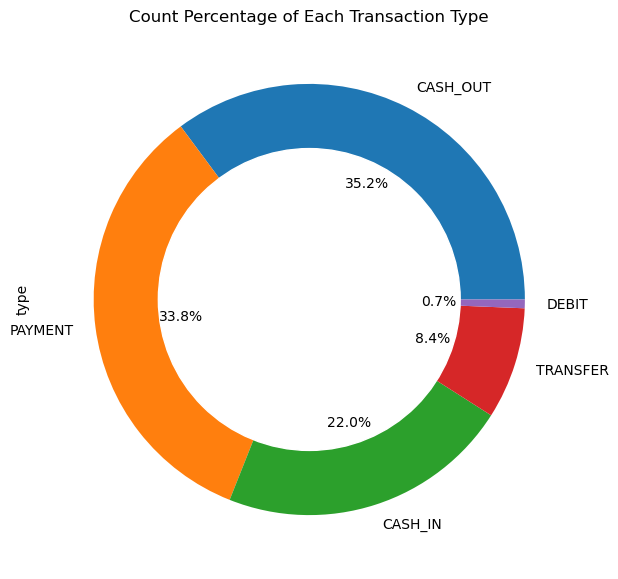

In [16]:
type.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,7))
circle = plt.Circle((0, 0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Count Percentage of Each Transaction Type')

plt.show()

From the donut plot above, we can see that the most used type from these online transaction is 'Cash Out'.  'Cash out' is a financial term that refers to the process of converting an asset into cash, typically by selling the asset. The term is often used in the context of real estate or business transactions where one party "cashes out" by selling their share of the property or business to another party for a profit.

In some contexts, "cash out" may also refer to withdrawing cash from an account, such as a bank account or a digital wallet, or to using a credit card to obtain cash.

Now, let's see how much from those online transaction type that actually is fraud

In [17]:
# Number of total fraud
total_fraud = payment_fraud_df['isFraud'].value_counts()[1]
total_fraud

8213

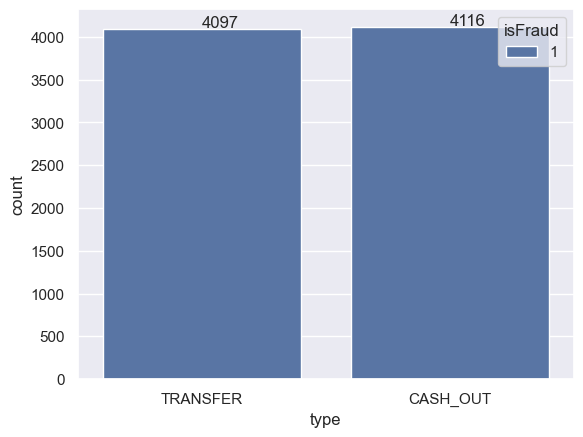

In [18]:
sns.set(style="darkgrid")
sns.countplot(x='type', hue='isFraud', data=payment_fraud_df[payment_fraud_df['isFraud'] == 1])
ax = plt.gca()

# Add count values to each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+20))

plt.show()


Out of 5 transaction type, seems like there are 2 out of 5 type that contains fraud.  Which is 4097 cases on transfer and 4116 cases on cash out with all of the total fraud cases is 8213.

### Name Origin and Destination

In [29]:
# Let's see unique value of this column
name_origin = payment_fraud_df[object_features[1]]
unique_origin = name_origin.nunique()
print(f'Number of unique name origin value {unique_origin}')

Number of unique name origin value 6353307


Seems like the unique value is a bit different from the total number of records, lets check:

In [30]:
diff = name_origin.count() - name_origin.nunique()
print(f'Difference between all record and unique origin: {diff}')

Difference between all record and unique origin: 9313


It's true that there are difference in value, this means that there are IDs who did multiple transaction.  Let's check:

In [21]:
name_origin.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

Now let's see the name destination:

In [32]:
name_destination = payment_fraud_df[object_features[2]]
unique_dest = name_destination.nunique()
print(f'Number of unique name destination value {unique_dest}')

Number of unique name destination value 2722362


In [33]:
diff2 = name_destination.count() - name_destination.nunique()
print(f'Difference between all record and unique destination: {diff2}')

Difference between all record and unique destination: 3640258


In [35]:
# Count diff percentage between dest and origin
diff_percentage = (unique_dest/unique_origin)*100
print(f'Percentage of unique dest vs unique origin: {diff_percentage:.1f} %')

Percentage of unique dest vs unique origin: 42.8 %


Seems like there are even more difference on the destination, more than half even.  This means that some origin user did an online transaction with the same destination user, perhaps could be an online seller account or something.  Because the value of destination is only 42,8 % of the origin user. 

That's all we can get from the object-type columns, in the context of machine learning the 'nameOrig' and 'nameDest' column won't be used to feed the train data because most of it are unique and does not provide meaningful information to serve as pattern/relationship for the algorithm to learn from, that's why we are gonna drop these column later.  But we do explore it as well, just for the insight gain.

## Numerical Features Exploratory

In [37]:
# Define numerical feature column
numerical_features = payment_fraud_df.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

Now let's see the numerical data distribution and outlier using boxplot, but because the dataset is too big (over 6 million records), we are gonna take some sample to plot, so we can see the patterns better

## Distribution and Outliers Visualization

In [49]:
# Define function to visualize
def plot_distribution_outlier(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    sns.histplot(data=dataframe.sample(50000), x=col, ax=ax[0], kde=True)
    ax[0].set_title(f'{col.title()} Histogram')

    sns.boxplot(data=dataframe.sample(50000), x=col, ax=ax[1])
    ax[1].set_title(f'{col.title()} Boxplot')
    plt.show()        

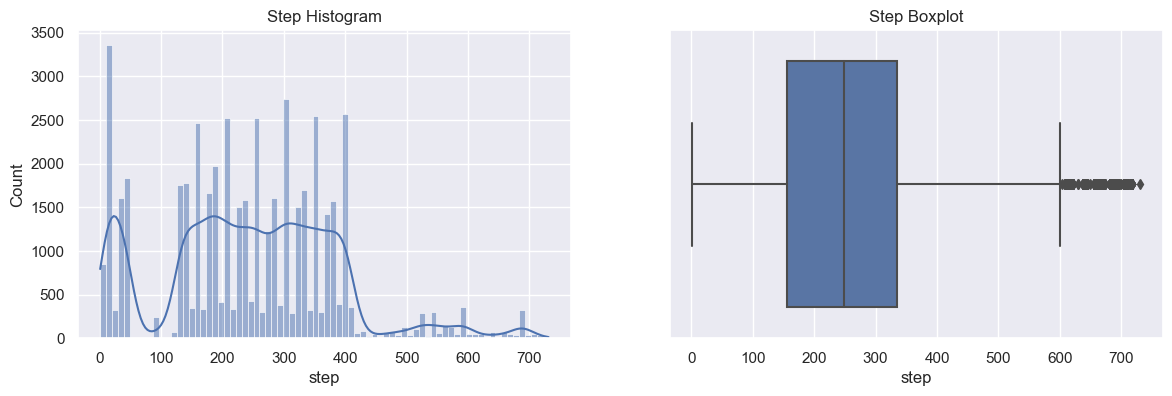

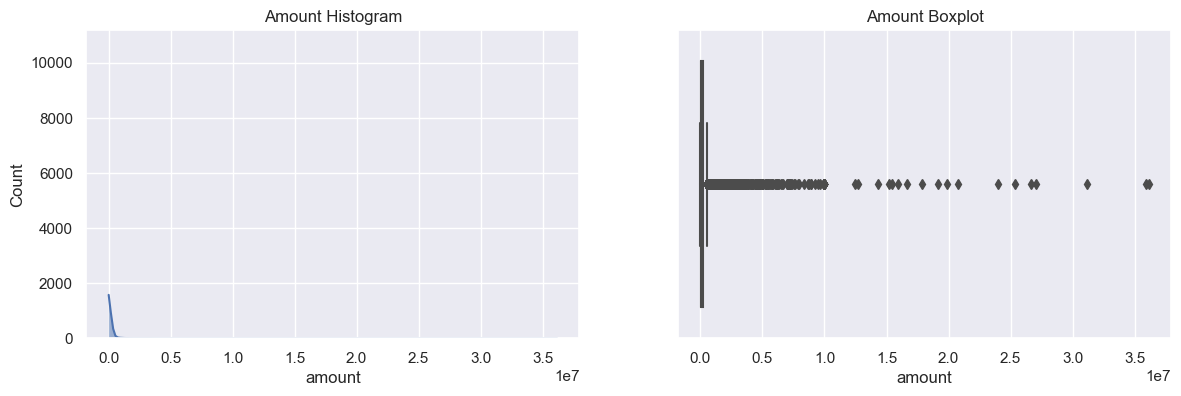

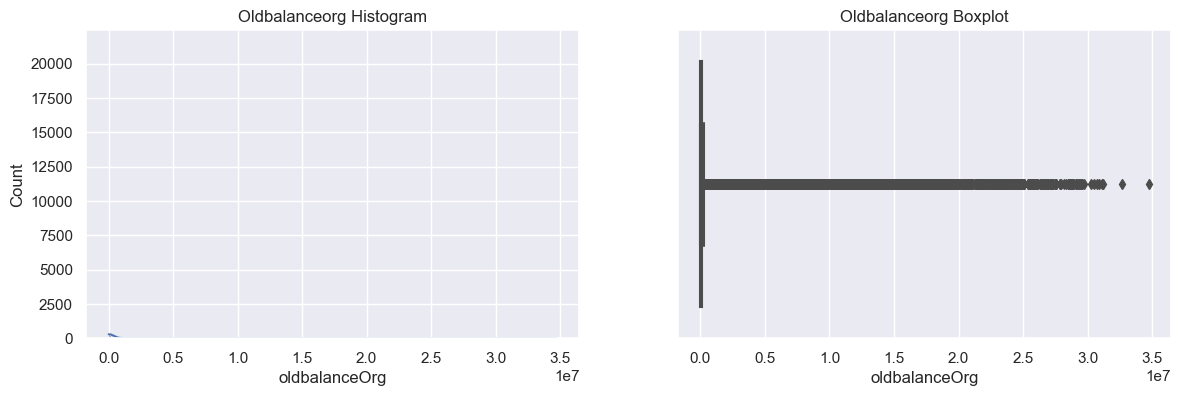

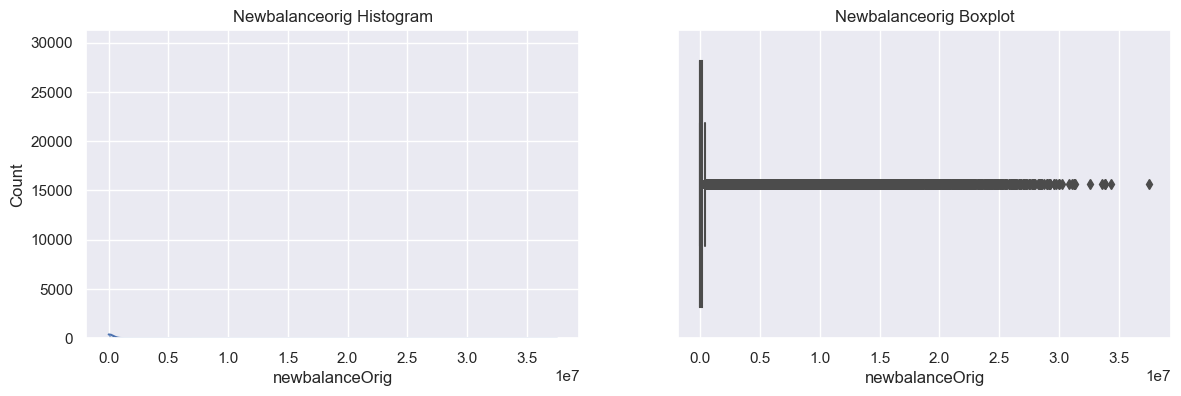

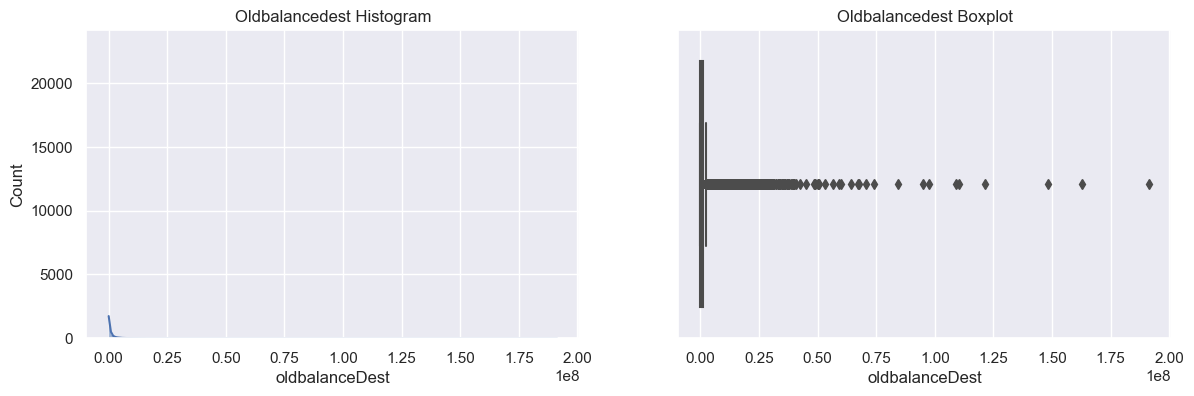

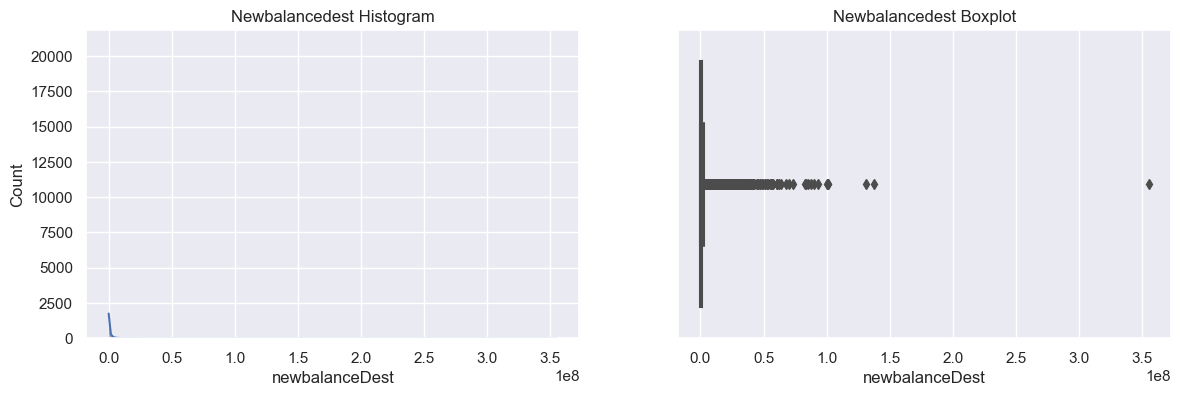

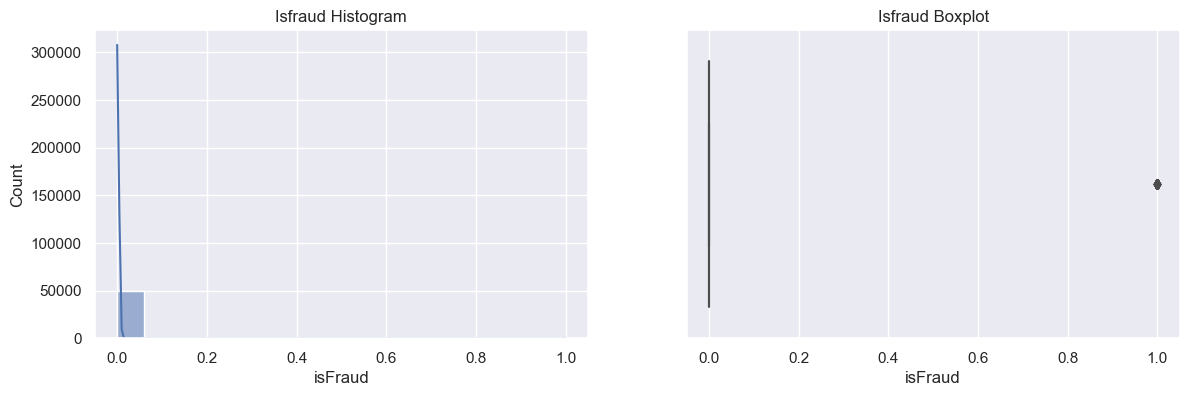

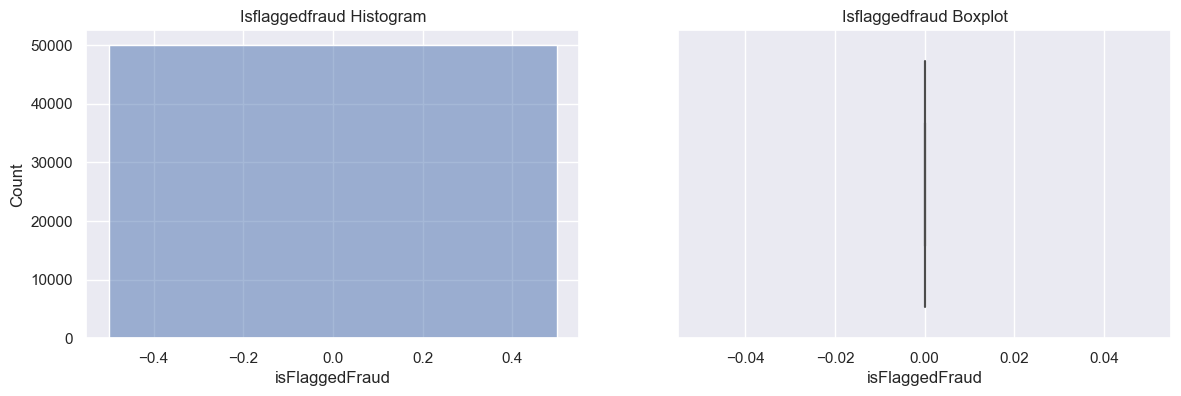

In [50]:
for col in numerical_features:
    plot_distribution_outlier(payment_fraud_df.sample(50000), col)

From the visualization above, we can see that the data contains so much outlier and most of the data is skewed that's why the plotted graph is only shown a little but have high threshold on axis-y.  What we can do from these later is to remove outliers and use scaler to handle skewed data. 

edit: I've tried removing outliers, but because it is too much not all of the outliers are removed and also it considers the isFraud label and isFlaggedFraud label as an outliers and delete them as well.  This could mean that all of the fraud transaction can be considered outliers.  Thats why we are not removing them, and instead use machine learning algorithm that can withstand it.

Next we are gonna see the correlation for numerical feature selection.

In [59]:
payment_fraud_df.shape

(6362620, 11)

## Feature Correlation Visualization

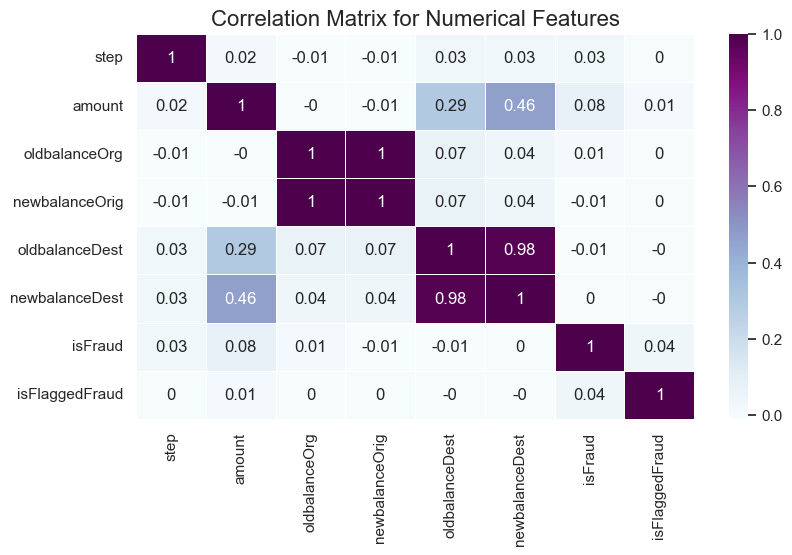

In [58]:
plt.figure(figsize=(9, 5))
correlation_matrix = payment_fraud_df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features', size=16)
plt.show()

From the above correlation matrix, we can see that many of the feature actually have less correlation toward each other.  But there's 4 feature who have high correlation (1), which is oldBalanceOrd-newBalanceOrg and oldBalanceDest-newBalanceDest.  From the earlier Data Understanding we can see that this is the amount of balance the sender and receiver have after doing the transaction.  Because of this high correlation we could reduce the overall feature by doing feature engineering that combine the old and new balance for origin and destination.

## Feature Engineering
Create new feature with the difference of old and new balance

In [60]:
payment_fraud_df['diffOrig'] = payment_fraud_df['oldbalanceOrg'] - payment_fraud_df['newbalanceOrig']
payment_fraud_df['diffDest'] = payment_fraud_df['oldbalanceDest'] - payment_fraud_df['newbalanceDest']

In [63]:
payment_fraud_df.sample(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffOrig,diffDest
4496066,325,PAYMENT,6230.66,C309711692,179347.46,173116.79,M1947278888,0.00,0.00,0,0,6230.67,0.00
305558,15,CASH_OUT,46280.40,C355542380,0.00,0.00,C573103075,70858.00,117138.40,0,0,0.00,-46280.40
4165252,304,CASH_IN,203528.51,C1601868950,229326.94,432855.46,C516170529,378320.19,174791.67,0,0,-203528.52,203528.52
4451812,323,CASH_IN,284687.05,C1284868428,40984.00,325671.05,C1800466361,0.00,0.00,0,0,-284687.05,0.00
1001968,45,PAYMENT,2519.95,C2021904982,21678.94,19158.99,M1504822604,0.00,0.00,0,0,2519.95,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287733,15,CASH_IN,133916.70,C1573762657,20487.00,154403.70,C1218630817,51350.62,0.00,0,0,-133916.70,51350.62
6052962,495,CASH_IN,48226.68,C665144523,1085.00,49311.68,C999907694,291322.49,243095.81,0,0,-48226.68,48226.68
6060520,500,CASH_IN,170859.49,C722039085,21506.00,192365.49,C1521164392,1694522.70,1523663.21,0,0,-170859.49,170859.49
6259760,601,PAYMENT,1228.08,C325697100,2849.00,1620.92,M1074809647,0.00,0.00,0,0,1228.08,0.00


## Drop Unnecessary Columns

From our above exploration, we could define some unnecesary column that we could drop

In [65]:
cleaned_df = payment_fraud_df.drop(['nameOrig', 'nameDest', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

In [67]:
cleaned_df.head()

,step,type,amount,isFraud,isFlaggedFraud,diffOrig,diffDest
0,1,PAYMENT,9839.64,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,0,0,1864.28,0.0
2,1,TRANSFER,181.00,1,0,181.00,0.0
3,1,CASH_OUT,181.00,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,0,0,11668.14,0.0


## Save Dataset
Next we will save the cleaned dataframe as csv dataset to use in machine learning pipeline

In [72]:
cleaned_df.to_csv('../dataset/cleaned-fraud-payments.csv', index=False)